In [1]:
import os
os.chdir('/content/drive/MyDrive/Colab Notebooks')

In [2]:
# импорт модулей
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
import sklearn

In [3]:
# загрузка датасета
from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [4]:
# создание своего разбиения датасета
from sklearn.model_selection import train_test_split
# объединяем в один набор
X = np.concatenate((X_train, X_test))
y = np.concatenate((y_train, y_test))
# разбиваем по вариантам
X_train, X_test, y_train, y_test = train_test_split(X, y,
test_size = 10000,
train_size = 60000,
random_state = 15)

In [5]:
# вывод размерностей
print('Shape of X train:', X_train.shape)
print('Shape of y train:', y_train.shape)

Shape of X train: (60000, 28, 28)
Shape of y train: (60000,)


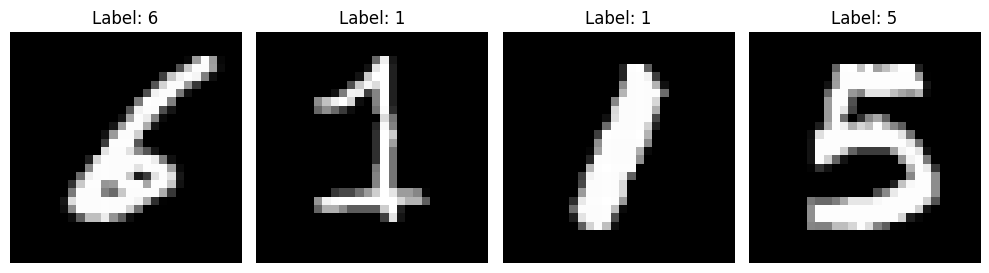

In [6]:
# Вывод 4 изображений
plt.figure(figsize=(10, 3))
for i in range(4):
    plt.subplot(1, 4, i + 1)
    plt.imshow(X_train[i], cmap='gray')
    plt.title(f'Label: {y_train[i]}')
    plt.axis('off')
plt.tight_layout()
plt.show()

In [7]:
# развернем каждое изображение 28*28 в вектор 784
num_pixels = X_train.shape[1] * X_train.shape[2]
X_train = X_train.reshape(X_train.shape[0], num_pixels) / 255
X_test = X_test.reshape(X_test.shape[0], num_pixels) / 255
print('Shape of transformed X train:', X_train.shape)

Shape of transformed X train: (60000, 784)


In [8]:
# переведем метки в one-hot
from keras.utils import to_categorical

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

print('Shape of transformed y train:', y_train.shape)
num_classes = y_train.shape[1]

Shape of transformed y train: (60000, 10)


In [9]:
from keras.models import Sequential
from keras.layers import Dense

In [10]:
# 1. создаем модель - объявляем ее объектом класса Sequential
model = Sequential()
# 2. добавляем выходной слой(скрытые слои отсутствуют)
model.add(Dense(units=num_classes, activation='softmax'))
# 3. компилируем модель
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [11]:
# вывод информации об архитектуре модели
print(model.summary())

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

None


In [12]:
# обучение модели
H = model.fit(X_train, y_train, validation_split=0.1, epochs=50)

Epoch 1/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.7052 - loss: 1.1704 - val_accuracy: 0.8648 - val_loss: 0.5294
Epoch 2/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.8749 - loss: 0.4901 - val_accuracy: 0.8818 - val_loss: 0.4435
Epoch 3/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8904 - loss: 0.4153 - val_accuracy: 0.8877 - val_loss: 0.4085
Epoch 4/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8953 - loss: 0.3858 - val_accuracy: 0.8927 - val_loss: 0.3866
Epoch 5/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8984 - loss: 0.3630 - val_accuracy: 0.8950 - val_loss: 0.3737
Epoch 6/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9014 - loss: 0.3549 - val_accuracy: 0.8977 - val_loss: 0.3633
Epoch 7/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9036 - loss: 0.3455 - val_accuracy: 0.8998 - val_loss: 0.3553
Epoch 8/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9061 - loss: 0.3383 - 

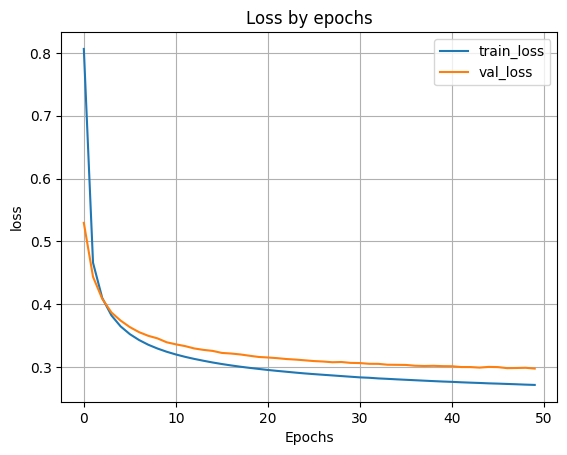

In [13]:
# вывод графика ошибки по эпохам
plt.plot(H.history['loss'])
plt.plot(H.history['val_loss'])
plt.grid()
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend(['train_loss', 'val_loss'])
plt.title('Loss by epochs')
plt.show()

In [14]:
# Оценка качества работы модели на тестовых данных
scores = model.evaluate(X_test, y_test)
print('Loss on test data:', scores[0])
print('Accuracy on test data:', scores[1])

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9313 - loss: 0.2648
Loss on test data: 0.2729383409023285
Accuracy on test data: 0.9290000200271606


In [15]:
# сохранение модели на диск
model.save('/content/drive/MyDrive/Colab Notebooks/models/model_zero_hide.keras')

In [16]:
model100 = Sequential()
model100.add(Dense(units=100,input_dim=num_pixels, activation='sigmoid'))
model100.add(Dense(units=num_classes, activation='softmax'))

model100.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [17]:
# вывод информации об архитектуре модели
print(model100.summary())

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_1 (Dense)                 │ (None, 100)            │        78,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

None


In [18]:
# Обучаем модель
H = model100.fit(X_train, y_train, validation_split=0.1, epochs=50)

Epoch 1/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.5502 - loss: 1.8732 - val_accuracy: 0.8025 - val_loss: 0.9640
Epoch 2/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8292 - loss: 0.8451 - val_accuracy: 0.8508 - val_loss: 0.6354
Epoch 3/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8635 - loss: 0.5842 - val_accuracy: 0.8683 - val_loss: 0.5187
Epoch 4/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8762 - loss: 0.4870 - val_accuracy: 0.8822 - val_loss: 0.4603
Epoch 5/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8868 - loss: 0.4312 - val_accuracy: 0.8875 - val_loss: 0.4235
Epoch 6/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8923 - loss: 0.3969 - val_accuracy: 0.8895 - val_loss: 0.3990
Epoch 7/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9005 - loss: 0.3701 - val_accuracy: 0.8928 - val_loss: 0.3803
Epoch 8/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8989 - loss: 0.3632 - 

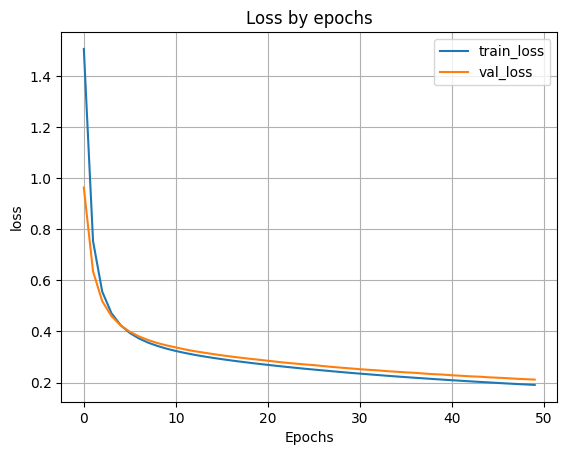

In [19]:
# вывод графика ошибки по эпохам
plt.plot(H.history['loss'])
plt.plot(H.history['val_loss'])
plt.grid()
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend(['train_loss', 'val_loss'])
plt.title('Loss by epochs')
plt.show()

In [20]:
# Оценка качества работы модели на тестовых данных
scores = model100.evaluate(X_test, y_test)
print('Loss on test data:', scores[0])
print('Accuracy on test data:', scores[1])

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9500 - loss: 0.1884
Loss on test data: 0.1930633932352066
Accuracy on test data: 0.9473999738693237


In [21]:
# сохранение модели на диск
model100.save('/content/drive/MyDrive/Colab Notebooks/models/model100in_1hide.keras')

In [22]:
model300 = Sequential()
model300.add(Dense(units=300,input_dim=num_pixels, activation='sigmoid'))
model300.add(Dense(units=num_classes, activation='softmax'))

model300.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [23]:
# вывод информации об архитектуре модели
print(model300.summary())

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 10)             │         3,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 238,510 (931.68 KB)

 Trainable params: 238,510 (931.68 KB)

 Non-trainable params: 0 (0.00 B)

None


In [24]:
# Обучаем модель
H = model300.fit(X_train, y_train, validation_split=0.1, epochs=50)

Epoch 1/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.5442 - loss: 1.8087 - val_accuracy: 0.8263 - val_loss: 0.8667
Epoch 2/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8410 - loss: 0.7567 - val_accuracy: 0.8605 - val_loss: 0.5823
Epoch 3/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8672 - loss: 0.5408 - val_accuracy: 0.8788 - val_loss: 0.4845
Epoch 4/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8809 - loss: 0.4565 - val_accuracy: 0.8853 - val_loss: 0.4378
Epoch 5/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8884 - loss: 0.4120 - val_accuracy: 0.8902 - val_loss: 0.4057
Epoch 6/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8944 - loss: 0.3836 - val_accuracy: 0.8932 - val_loss: 0.3863
Epoch 7/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8988 - loss: 0.3663 - val_accuracy: 0.8943 - val_loss: 0.3728
Epoch 8/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9008 - loss: 0.3515 - 

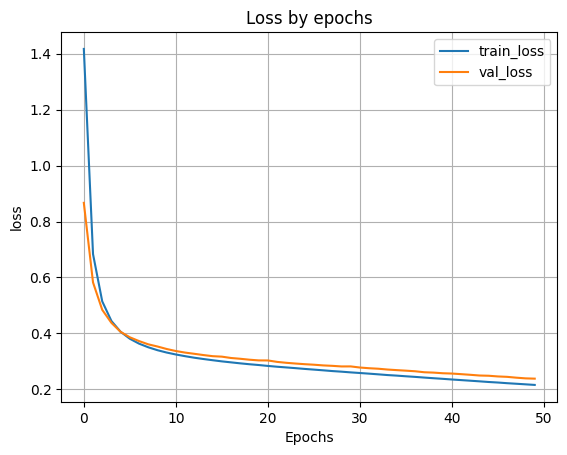

In [25]:
# вывод графика ошибки по эпохам
plt.plot(H.history['loss'])
plt.plot(H.history['val_loss'])
plt.grid()
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend(['train_loss', 'val_loss'])
plt.title('Loss by epochs')
plt.show()

In [26]:
# Оценка качества работы модели на тестовых данных
scores = model300.evaluate(X_test, y_test)
print('Loss on test data:', scores[0])
print('Accuracy on test data:', scores[1])

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9444 - loss: 0.2126
Loss on test data: 0.2181043177843094
Accuracy on test data: 0.9419999718666077


In [27]:
# сохранение модели на диск
model300.save('/content/drive/MyDrive/Colab Notebooks/models/model300in_1hide.keras')

In [28]:
model500 = Sequential()
model500.add(Dense(units=500,input_dim=num_pixels, activation='sigmoid'))
model500.add(Dense(units=num_classes, activation='softmax'))

model500.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [29]:
# вывод информации об архитектуре модели
print(model500.summary())

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                 │ (None, 500)            │       392,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 10)             │         5,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 397,510 (1.52 MB)

 Trainable params: 397,510 (1.52 MB)

 Non-trainable params: 0 (0.00 B)

None


In [30]:
# Обучаем модель
H = model500.fit(X_train, y_train, validation_split=0.1, epochs=50)

Epoch 1/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.5502 - loss: 1.7606 - val_accuracy: 0.8245 - val_loss: 0.8323
Epoch 2/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.8380 - loss: 0.7271 - val_accuracy: 0.8622 - val_loss: 0.5687
Epoch 3/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8677 - loss: 0.5258 - val_accuracy: 0.8782 - val_loss: 0.4738
Epoch 4/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8807 - loss: 0.4537 - val_accuracy: 0.8863 - val_loss: 0.4287
Epoch 5/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8888 - loss: 0.4060 - val_accuracy: 0.8903 - val_loss: 0.4030
Epoch 6/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8949 - loss: 0.3814 - val_accuracy: 0.8942 - val_loss: 0.3843
Epoch 7/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8982 - loss: 0.3631 - val_accuracy: 0.8970 - val_loss: 0.3695
Epoch 8/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8990 - loss: 0.3528 - 

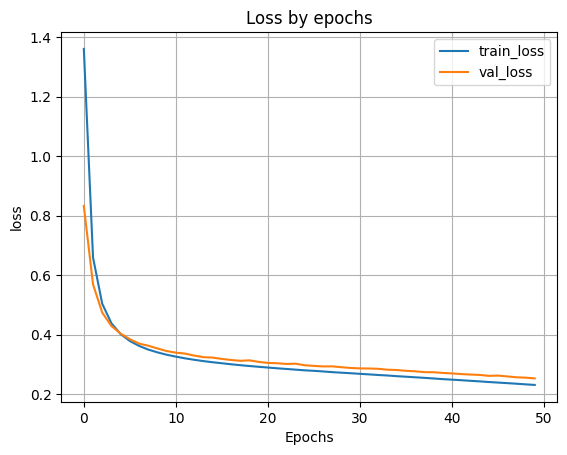

In [31]:
# вывод графика ошибки по эпохам
plt.plot(H.history['loss'])
plt.plot(H.history['val_loss'])
plt.grid()
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend(['train_loss', 'val_loss'])
plt.title('Loss by epochs')
plt.show()

In [32]:
# Оценка качества работы модели на тестовых данных
scores = model500.evaluate(X_test, y_test)
print('Loss on test data:', scores[0])
print('Accuracy on test data:', scores[1])

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9401 - loss: 0.2261
Loss on test data: 0.2324201464653015
Accuracy on test data: 0.9376000165939331


In [33]:
# сохранение модели на диск
model500.save('/content/drive/MyDrive/Colab Notebooks/models/model500in_1hide.keras')

In [34]:
model10050 = Sequential()
model10050.add(Dense(units=100,input_dim=num_pixels, activation='sigmoid'))
model10050.add(Dense(units=50,activation='sigmoid'))
model10050.add(Dense(units=num_classes, activation='softmax'))

model10050.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [35]:
# вывод информации об архитектуре модели
print(model10050.summary())

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_7 (Dense)                 │ (None, 100)            │        78,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 50)             │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 10)             │           510 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 84,060 (328.36 KB)

 Trainable params: 84,060 (328.36 KB)

 Non-trainable params: 0 (0.00 B)

None


In [36]:
# Обучаем модель
H = model10050.fit(X_train, y_train, validation_split=0.1, epochs=50)

Epoch 1/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.2227 - loss: 2.2802 - val_accuracy: 0.4622 - val_loss: 2.0805
Epoch 2/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.5419 - loss: 1.9606 - val_accuracy: 0.6317 - val_loss: 1.5174
Epoch 3/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.6736 - loss: 1.3815 - val_accuracy: 0.7442 - val_loss: 1.0607
Epoch 4/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7579 - loss: 0.9849 - val_accuracy: 0.7940 - val_loss: 0.8175
Epoch 5/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8073 - loss: 0.7717 - val_accuracy: 0.8348 - val_loss: 0.6708
Epoch 6/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8399 - loss: 0.6320 - val_accuracy: 0.8545 - val_loss: 0.5783
Epoch 7/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8582 - loss: 0.5480 - val_accuracy: 0.8662 - val_loss: 0.5183
Epoch 8/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8725 - loss: 0.4895 - 

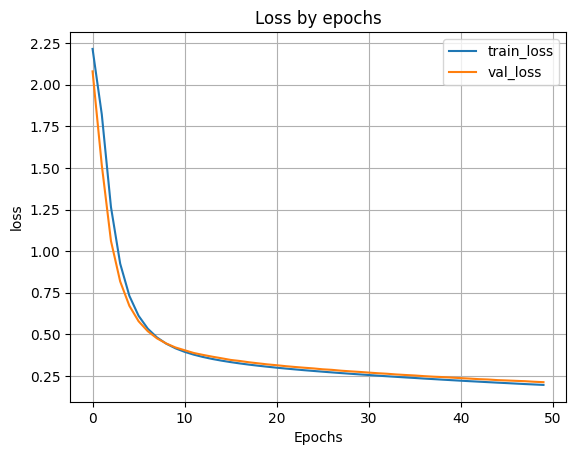

In [37]:
# вывод графика ошибки по эпохам
plt.plot(H.history['loss'])
plt.plot(H.history['val_loss'])
plt.grid()
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend(['train_loss', 'val_loss'])
plt.title('Loss by epochs')
plt.show()

In [38]:
# Оценка качества работы модели на тестовых данных
scores = model10050.evaluate(X_test, y_test)
print('Loss on test data:', scores[0])
print('Accuracy on test data:', scores[1])

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9476 - loss: 0.1931
Loss on test data: 0.1974852979183197
Accuracy on test data: 0.9449999928474426


In [39]:
# сохранение модели на диск
model10050.save('/content/drive/MyDrive/Colab Notebooks/models/model100in_1hide_50in_2hide.keras')

In [40]:
model100100 = Sequential()
model100100.add(Dense(units=100,input_dim=num_pixels, activation='sigmoid'))
model100100.add(Dense(units=100,activation='sigmoid'))
model100100.add(Dense(units=num_classes, activation='softmax'))

model100100.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [41]:
# вывод информации об архитектуре модели
print(model100100.summary())

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                │ (None, 100)            │        78,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 89,610 (350.04 KB)

 Trainable params: 89,610 (350.04 KB)

 Non-trainable params: 0 (0.00 B)

None


In [42]:
# Обучаем модель
H = model100100.fit(X_train, y_train, validation_split=0.1, epochs=50)

Epoch 1/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.2072 - loss: 2.2849 - val_accuracy: 0.5913 - val_loss: 2.1135
Epoch 2/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.5483 - loss: 2.0036 - val_accuracy: 0.6333 - val_loss: 1.5555
Epoch 3/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.6781 - loss: 1.4029 - val_accuracy: 0.7727 - val_loss: 1.0336
Epoch 4/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7912 - loss: 0.9437 - val_accuracy: 0.8180 - val_loss: 0.7608
Epoch 5/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8356 - loss: 0.7032 - val_accuracy: 0.8483 - val_loss: 0.6186
Epoch 6/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8556 - loss: 0.5826 - val_accuracy: 0.8627 - val_loss: 0.5368
Epoch 7/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8689 - loss: 0.5120 - val_accuracy: 0.8722 - val_loss: 0.4862
Epoch 8/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8786 - loss: 0.4576 - 

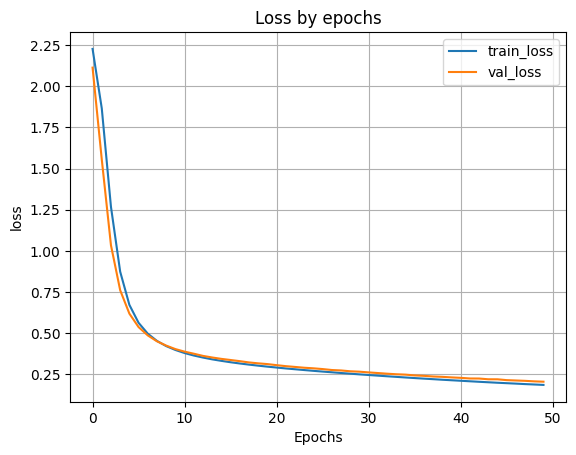

In [43]:
# вывод графика ошибки по эпохам
plt.plot(H.history['loss'])
plt.plot(H.history['val_loss'])
plt.grid()
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend(['train_loss', 'val_loss'])
plt.title('Loss by epochs')
plt.show()

In [44]:
# Оценка качества работы модели на тестовых данных
scores = model100100.evaluate(X_test, y_test)
print('Loss on test data:', scores[0])
print('Accuracy on test data:', scores[1])

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9485 - loss: 0.1814
Loss on test data: 0.18734164535999298
Accuracy on test data: 0.9470000267028809


In [45]:
# сохранение модели на диск
model100100.save('/content/drive/MyDrive/Colab Notebooks/models/model100in_1hide_100in_2hide.keras')

In [46]:
# сохранение лучшей модели в папку best_model
model100.save('/content/drive/MyDrive/Colab Notebooks/best_model/model100.keras')

In [47]:
# Загрузка модели с диска
from keras.models import load_model
model = load_model('/content/drive/MyDrive/Colab Notebooks/best_model/model100.keras')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
NN output: [[3.7926259e-03 9.0994104e-07 2.0981293e-04 2.9478846e-02 2.0727816e-06
  9.6508384e-01 7.6052487e-07 5.7595258e-05 1.0619552e-03 3.1140275e-04]]


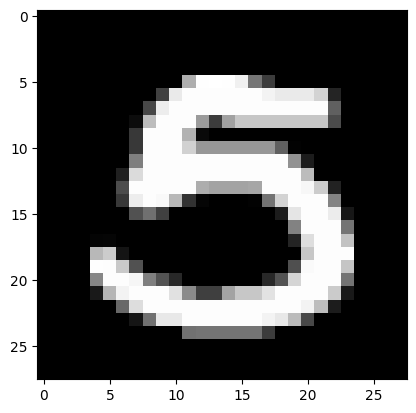

Real mark:  5
NN answer:  5


In [52]:
# вывод тестового изображения и результата распознавания
n = 222
result = model.predict(X_test[n:n+1])
print('NN output:', result)
plt.imshow(X_test[n].reshape(28,28), cmap=plt.get_cmap('gray'))
plt.show()
print('Real mark: ', str(np.argmax(y_test[n])))
print('NN answer: ', str(np.argmax(result)))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
NN output: [[7.6678516e-06 2.1507578e-06 2.5754166e-04 6.3994766e-04 2.8644723e-04
  2.3038971e-04 1.0776109e-05 2.3045135e-05 9.9186021e-01 6.6818334e-03]]


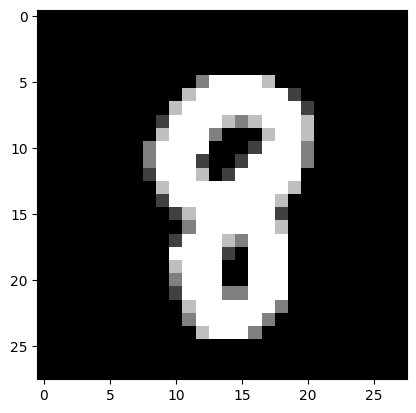

Real mark:  8
NN answer:  8


In [53]:
# вывод тестового изображения и результата распознавания
n = 123
result = model.predict(X_test[n:n+1])
print('NN output:', result)
plt.imshow(X_test[n].reshape(28,28), cmap=plt.get_cmap('gray'))
plt.show()
print('Real mark: ', str(np.argmax(y_test[n])))
print('NN answer: ', str(np.argmax(result)))

In [56]:
# загрузка собственного изображения
from PIL import Image
file_data = Image.open('test.png')
file_data = file_data.convert('L') # перевод в градации серого
test_img = np.array(file_data)

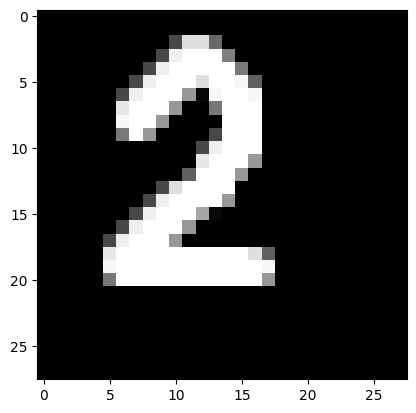

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
I think it's  2


In [57]:
# вывод собственного изображения
plt.imshow(test_img, cmap=plt.get_cmap('gray'))
plt.show()
# предобработка
test_img = test_img / 255
test_img = test_img.reshape(1, num_pixels)
# распознавание
result = model.predict(test_img)
print('I think it\'s ', np.argmax(result))

In [59]:
# загрузка собственного изображения
from PIL import Image
file2_data = Image.open('test2.png')
file2_data = file2_data.convert('L') # перевод в градации серого
test2_img = np.array(file2_data)

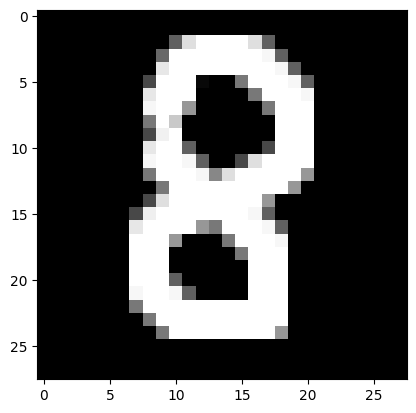

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
I think it's  8


In [60]:
# вывод собственного изображения
plt.imshow(test2_img, cmap=plt.get_cmap('gray'))
plt.show()
# предобработка
test2_img = test2_img / 255
test2_img = test2_img.reshape(1, num_pixels)
# распознавание
result_2 = model.predict(test2_img)
print('I think it\'s ', np.argmax(result_2))

In [61]:
# загрузка собственного изображения, повернутого на 90 градусов
from PIL import Image
file90_data = Image.open('test90.png')
file90_data = file90_data.convert('L') # перевод в градации серого
test90_img = np.array(file90_data)

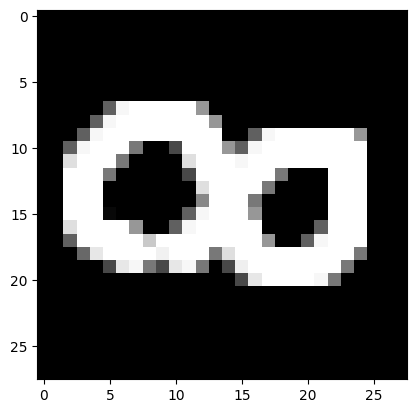

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
I think it's  8


In [62]:
# вывод собственного изображения
plt.imshow(test90_img, cmap=plt.get_cmap('gray'))
plt.show()
# предобработка
test90_img = test90_img / 255
test90_img = test90_img.reshape(1, num_pixels)
# распознавание
result_3 = model.predict(test90_img)
print('I think it\'s ', np.argmax(result_3))

In [63]:
# загрузка собственного изображения, повернутого на 90 градусов
from PIL import Image
file902_data = Image.open('test90_2.png')
file902_data = file902_data.convert('L') # перевод в градации серого
test902_img = np.array(file902_data)

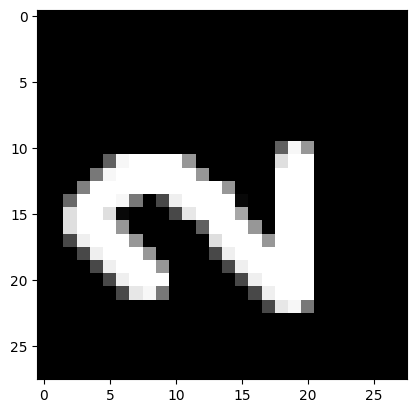

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
I think it's  4


In [64]:
# вывод собственного изображения
plt.imshow(test902_img, cmap=plt.get_cmap('gray'))
plt.show()
# предобработка
test902_img = test902_img / 255
test902_img = test902_img.reshape(1, num_pixels)
# распознавание
result_4 = model.predict(test902_img)
print('I think it\'s ', np.argmax(result_4))